ANALYSIS PURPOSE
The analysis purpose of the wine quality dataset classification is to predict the quality of red wine based on it's given properties. The dataset has 11 input variables, including density, pH, sulfates, alcohol, free sulfur dioxide, total sulfur dioxide, fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, and sulfates. It also has one output variable, which is the wine's quality score on a scale of 0-10. The objective of this analysis is to categorize a specific red wine's quality based on its characteristics. 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Upload the data from the CSV file
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
feature_cols = ["fixed acidity","volatile acidity", "citric acidity","residual sugar",
                "chlorides","free sulfer dioxide", "total sulfer dioxide","density"
                ,"pH","sulphates","alchohol","quality"]

In [3]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


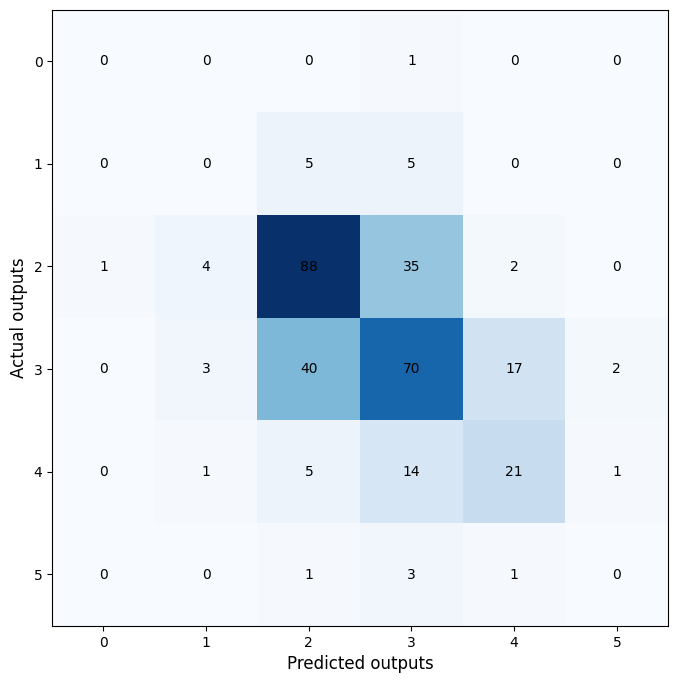

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.set_xticks(range(0, cm.shape[1]))
ax.set_yticks(range(0, cm.shape[0]))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

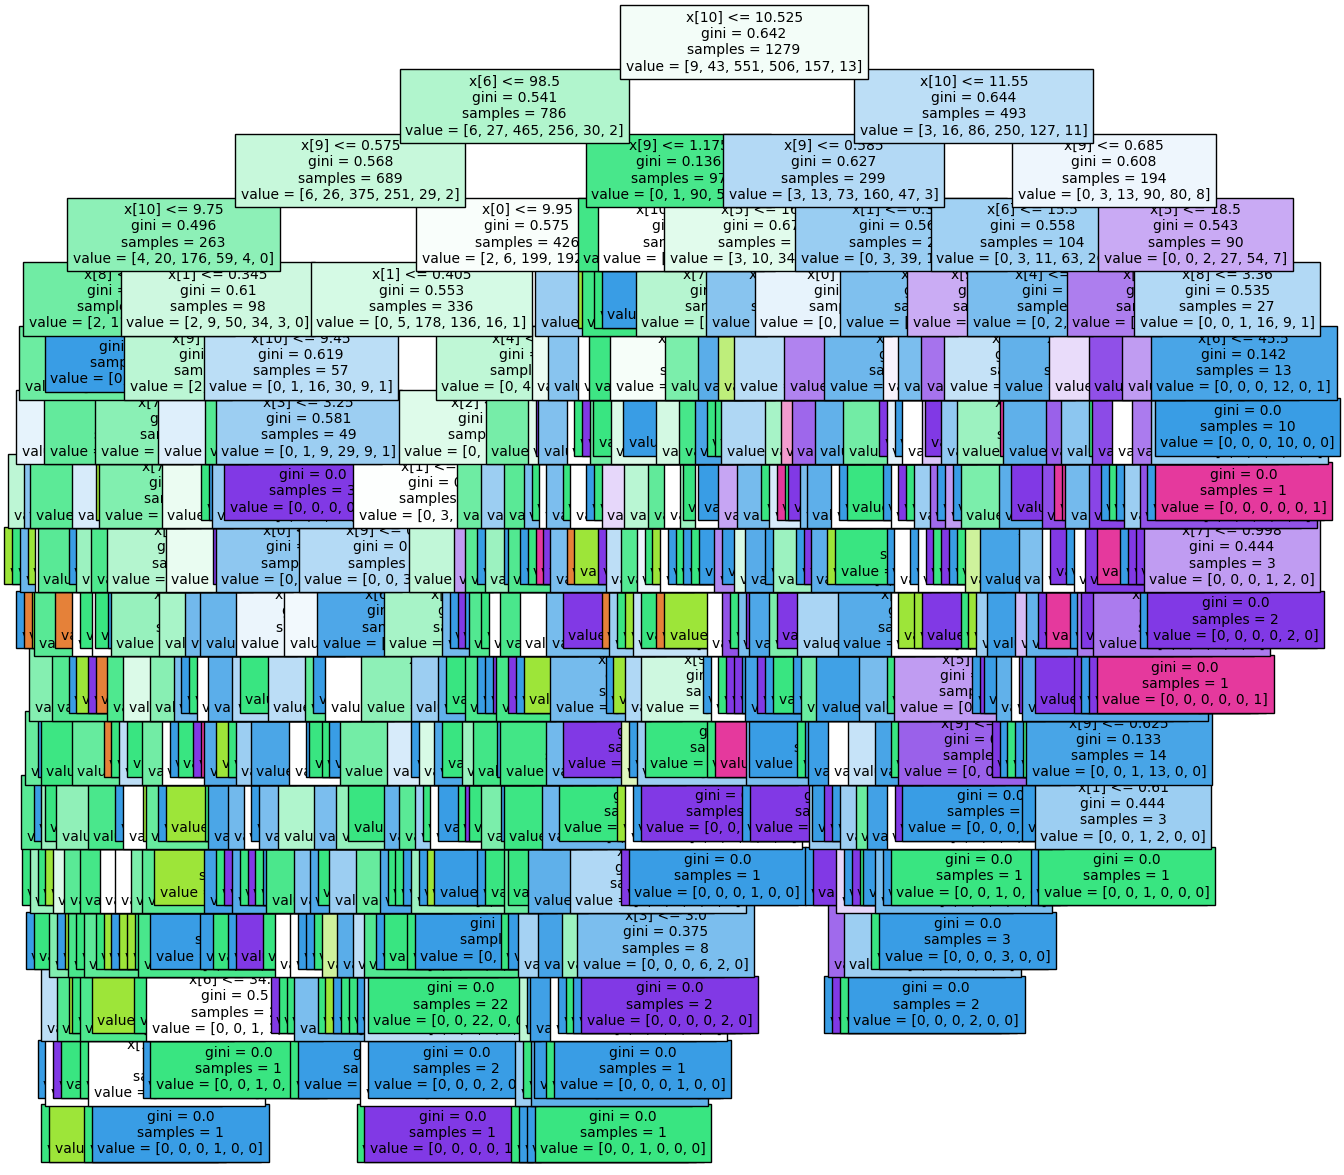

In [7]:
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, fontsize=10)
plt.show()